In [3]:
# Data analysis and wrangling
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix,classification_report
# suppress the warning adding the following lines to the imports of your program
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
# ignore all warnings
warnings.filterwarnings('ignore')
# sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)
sns.set_theme(color_codes=True)


In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree','age', 'label']
# load dataset
pima = pd.read_csv("C:/DataSets/DataSets/pima-indians-diabetes.csv", header=None,names=col_names)

In [7]:
pima.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
pima.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [13]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


<Axes: >

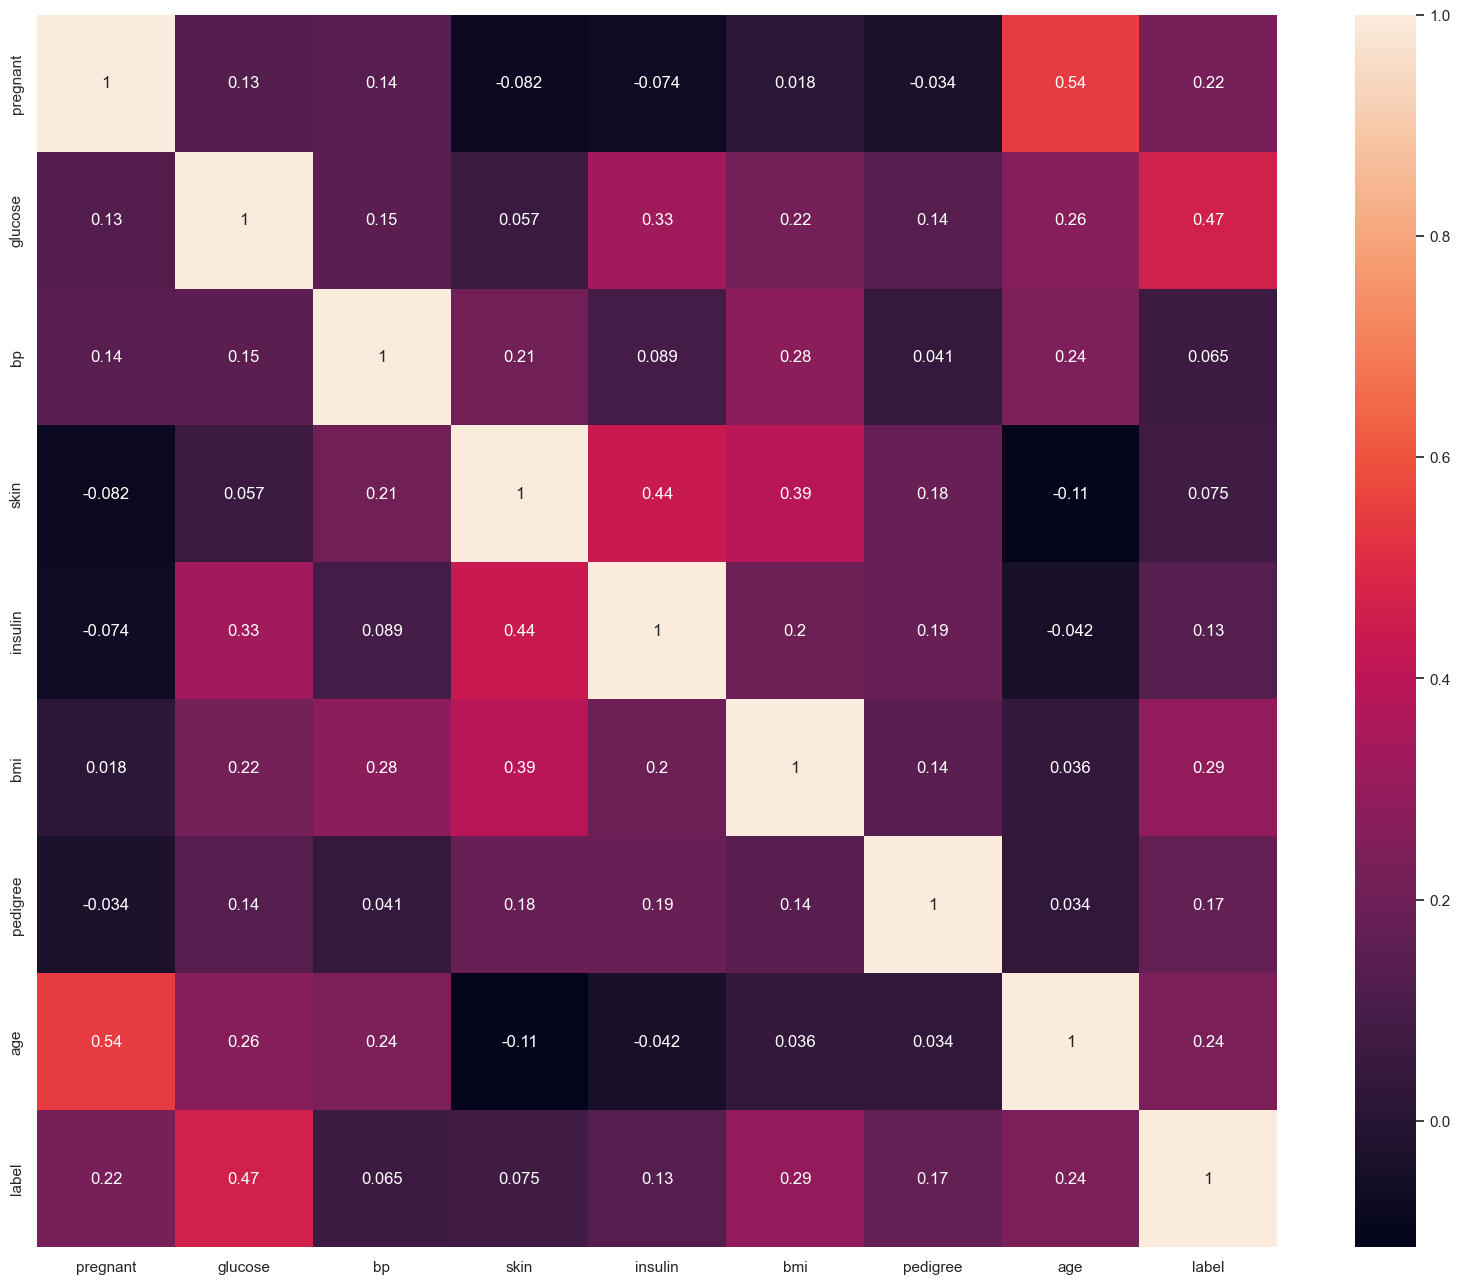

In [15]:
plt.figure(figsize=(20, 16))
sns.heatmap(pima.corr(), fmt='.2g', annot=True)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1) # 70% training and 30% test

In [21]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
dtree.fit(X_train,y_train)
# Predict the response for test dataset
y_pred = dtree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy of Decision Tree Classifier : ",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy of Decision Tree Classifier :  77.05627705627705


Accuracy :  0.7705627705627706
Sensitivity :  0.8493150684931506
Specificity :  0.6352941176470588
True Negative =  124
False Negative =  31
True Positive =  54
False Positive =  22
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



<Figure size 500x500 with 0 Axes>

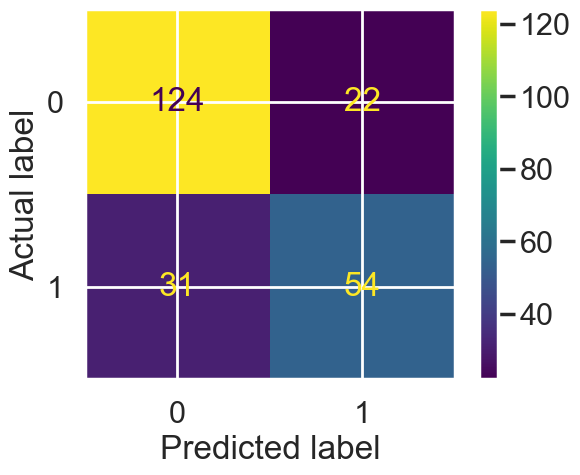

In [23]:
cm_dtree = confusion_matrix(y_test, y_pred)
# Calculating accuracy, sensitivity and specificity from confusion matrix
total_dtree=sum(sum(cm_dtree))
accuracy_dtree=(cm_dtree[0,0]+cm_dtree[1,1])/total_dtree
print('Accuracy : ', accuracy_dtree)
sensitivity_dtree = cm_dtree[0,0]/(cm_dtree[0,0]+cm_dtree[0,1])
print('Sensitivity : ', sensitivity_dtree)
specificity_dtree = cm_dtree[1,1]/(cm_dtree[1,0]+cm_dtree[1,1])
print('Specificity : ', specificity_dtree)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#tn = cm_dtree[0][0]
#fn = cm_dtree[1][0]
#tp = cm_dtree[1][1]
#fp = cm_dtree[0][1]
print("True Negative = ",tn)
print("False Negative = ",fn)
print("True Positive = ",tp)
print("False Positive = ",fp)
print(classification_report(y_test, y_pred, zero_division=1))
sns.set_context ("poster")
# Confusion matrix and derived metrics Display - New Format
plt.figure(figsize=(5,5))
from sklearn.metrics import ConfusionMatrixDisplay
_ = ConfusionMatrixDisplay.from_estimator(dtree, X_test , y_test)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#all_sample_title = 'Accuracy Score for Decision Tree Classifier is {0}'.
format(dtree.score(X_test, y_test))
#plt.title(all_sample_title, size = 15)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error, r2_score
import math
y_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of Decision Tree Classifier is ",round(dtree_accuracy*100 ,2), "%")
print("Accuracy Score of Decision Tree Classifier is ", dtree_accuracy)
#Print the training score and test score
dtree_training_score=dtree.score(X_train,y_train)
print(f"Training Score of Decision Tree Classifier:{dtree_training_score*100}%")
dtree_test_score=dtree.score(X_test,y_test)
print(f"Test score of Decision Tree Classifier:{dtree_test_score*100}%")

Accuracy Score of Decision Tree Classifier is  77.06 %
Accuracy Score of Decision Tree Classifier is  0.7705627705627706
Training Score of Decision Tree Classifier:76.35009310986965%
Test score of Decision Tree Classifier:77.05627705627705%


In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score, jaccard_score, log_loss
dtree_f1_score = f1_score(y_test, y_pred, average='micro')
dtree_precision_score = precision_score(y_test, y_pred, average='micro')
dtree_recall_score = recall_score(y_test, y_pred, average='micro')
dtree_jaccard_score = jaccard_score(y_test, y_pred, average='micro')
dtree_log_loss = log_loss(y_test, y_pred)
print('Scores Calculation using average: micro')
print('========================================')
print('F-1 Score of Decision Tree Classifier is ', dtree_f1_score)
print('Precision Score of Decision Tree Classifier is ', dtree_precision_score)
print('Recall Score of Decision Tree Classifier is ', dtree_recall_score)
print('Jaccard Score of Decision Tree Classifier is ', dtree_jaccard_score)
print('Log Loss of Decision Tree Classifier is ', dtree_log_loss)
# Manual Caluclation
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
dtree_accuracy_calculated = (tp + tn) / (tp + fp + fn + tn)
dtree_precision_calculated = tp / (tp + fp)
dtree_recall_calculated = tp / (tp + fn)
dtree_f1_score_calculated = 2 * ( (dtree_precision_calculated *dtree_recall_calculated) / (dtree_precision_calculated +dtree_recall_calculated) )
print('Scores Calculation using Manual Method')
print('========================================')
print('F-1 Score of Decision Tree Classifier is ', dtree_f1_score_calculated)
print('Precision Score of Decision Tree Classifier is ',dtree_precision_calculated)
print('Recall Score of Decision Tree Classifier is ', dtree_recall_calculated)
print("Accuracy Score of Decision Tree Classifier is ",dtree_accuracy_calculated)

Scores Calculation using average: micro
F-1 Score of Decision Tree Classifier is  0.7705627705627706
Precision Score of Decision Tree Classifier is  0.7705627705627706
Recall Score of Decision Tree Classifier is  0.7705627705627706
Jaccard Score of Decision Tree Classifier is  0.6267605633802817
Log Loss of Decision Tree Classifier is  8.269755972394846
Scores Calculation using Manual Method
F-1 Score of Decision Tree Classifier is  0.6708074534161491
Precision Score of Decision Tree Classifier is  0.7105263157894737
Recall Score of Decision Tree Classifier is  0.6352941176470588
Accuracy Score of Decision Tree Classifier is  0.7705627705627706


In [37]:
! pip install graphviz

In [56]:
! pip install pydotplus

In [62]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found